---
title: "Week 2 - Analysis of Variance"
date: 2024-04-11
date-format: full
author:
    - name:
          given: Pranav Kumar
          family: Mishra
      affiliations:
          - ref: rushsurg
          - ref: rushortho
      corresponding: true
      url: https://drpranavmishra.com
      email: pranav_k_mishra@rush.edu
      orcid: 0000-0001-5219-6269
      role: "Post Doctoral Research Fellow"

execute:
    enabled: false
    echo: true
    output: true
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Math, Latex


import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats

import patsy
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults

## One-way ANOVA

O<sup>6</sup> - Alkylquanine DNA alkyltransferase activity (AGT) and secondary leukemia


In [2]:
controls = [
    9.25, 7, 5.05, 6.9, 3.8, 9.5333, 7, 6.325, 6.05, 9, 4.0333, 8.0333, 7.1667, 5.775, 8.1, 8.7, 6.4, 5.775, 4.5, 3.2, 4.8333, 5, 11, 8.7, 5.875, 6.2, 9.6, 9.6333, 5.6, 10.45, 3.2, 8.4667, 8.3, 8.7, 8.3,
]

aml_de_novo = [11.15, 5.5, 5.2, 14.8, 4.4, 5.6]

aml_t = [5.15, 5.1, 1.7, 0.4, 5.5, 4.5, 6.7, 2.9667, 5.9, 3.8333, 5.55]

In [3]:
# Find the maximum length among all lists
max_length = max(len(controls), len(aml_de_novo), len(aml_t))

# Pad the shorter lists with NaN values to match the maximum length
controls += [np.nan] * (max_length - len(controls))
aml_de_novo += [np.nan] * (max_length - len(aml_de_novo))
aml_t += [np.nan] * (max_length - len(aml_t))

In [4]:
data = {"Controls": controls, "Primary": aml_de_novo, "Secondary": aml_t}
sl_df = pd.DataFrame(data)
sl_df

,Controls,Primary,Secondary
0,9.2500,11.15,5.1500
1,7.0000,5.50,5.1000
2,5.0500,5.20,1.7000
3,6.9000,14.80,0.4000
4,3.8000,4.40,5.5000
5,9.5333,5.60,4.5000
6,7.0000,NaN,6.7000
7,6.3250,NaN,2.9667
8,6.0500,NaN,5.9000
9,9.0000,NaN,3.8333


In [5]:
sl_df_melt = pd.melt(sl_df, var_name="Group", value_name="AGT").dropna(axis=0, subset=['AGT'])
sl_df_melt

,Group,AGT
0,Controls,9.2500
1,Controls,7.0000
2,Controls,5.0500
3,Controls,6.9000
4,Controls,3.8000
5,Controls,9.5333
6,Controls,7.0000
7,Controls,6.3250
8,Controls,6.0500
9,Controls,9.0000


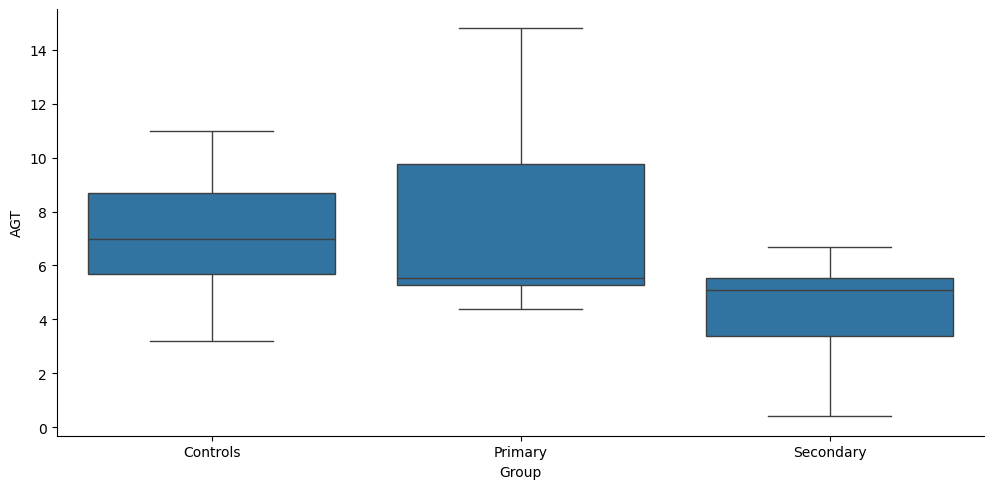

In [6]:
sns.catplot(data=sl_df_melt, x="Group", y="AGT", kind="box", aspect=2)

### Assumptions of ANOVA

1. Each observation is independent of all other observations
2. Each sample must be randomly selected from the population (e.g. patients are randomized into different treatment groups)
3. Data is normally distributed
4. Variances of different populations are equal

The first two points are the most important.


If $H_{0}$ is **true**:

$$\mu_{Controls} = \mu_{Primary} = \mu_{Secondary}$$


In [7]:
# scipy.stats
stats.f_oneway(
    sl_df_melt[sl_df_melt["Group"] == "Controls"]['AGT'],
    sl_df_melt[sl_df_melt["Group"] == "Primary"]['AGT'],
    sl_df_melt[sl_df_melt["Group"] == "Secondary"]['AGT']
)

F_onewayResult(statistic=6.447702046398812, pvalue=0.003267180257693189)

from https://nicoleeic.github.io/Brain_and_Code/2019/09/02/ANOVA_new.html


Steps to conducting an ANOVA:

1. Generate a model that fits our design
2. Fit our data to the model to get the parameter estimates
3. Derive stats from the summary function of the model


In [8]:
# 1. Generate a model that fits our design
# Linear regression

my_model = smf.ols(formula="AGT ~ Group", data=sl_df_melt)

my_model

In [9]:
# 2. Fit the data to the model

my_model_fit = my_model.fit()
my_model_fit

In [10]:
# 3. Summarize the data

my_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGT   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     6.448
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00327
Time:                        19:26:34   Log-Likelihood:                -117.01
No. Observations:                  52   AIC:                             240.0
Df Residuals:                      49   BIC:                             245.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0129      0.400     17.539      0.000       6.209       7.816
Group[T.Primary]       0.7621      1.045      0.729      0.469      -1.338       2.863
Group[T.Secondary]    -2.7129      0.818     -3.318      0.002      -4.356      -1.070
==============================================================================
Omnibus:                        1.602   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.134
Skew:                           0.360   Prob(JB):                        0.567
Kurtosis:                       3.063   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# ANOVA Table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)

display(anova_table)

,sum_sq,df,F,PR(>F)
Group,72.161746,2.0,6.447702,0.003267
Residual,274.200447,49.0,NaN,NaN


## Homework

### Rheumatoid arthritis treatments

Duration of morning stiffness is measured for each of the three groups:

1. Placebo
2. Drug A
3. Drug B

In [12]:
ra_placebo = [5.2, 6.8, 5.6, 6.1]
ra_drug_a = [3.7, 2.4, 5.1, 1.8]
ra_drug_b = [4.8, 5.9, 4.0, 4.7]

In [13]:
ra_data = {"Placebo": ra_placebo, "Drug A":ra_drug_a, "Drug B":ra_drug_b}

ra_df = pd.DataFrame(ra_data)
display(ra_df)

ra_df_melt = pd.melt(ra_df, var_name='Treatment', value_name='Stiffness')

,Placebo,Drug A,Drug B
0,5.2,3.7,4.8
1,6.8,2.4,5.9
2,5.6,5.1,4.0
3,6.1,1.8,4.7


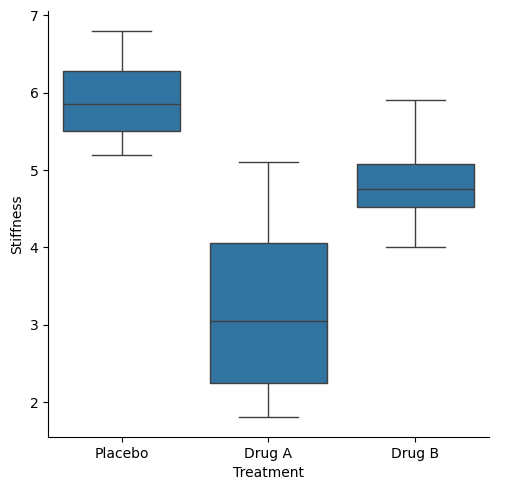

In [14]:
sns.catplot(data=ra_df_melt, x='Treatment', y='Stiffness', kind='box')

Using `scipy.stats`:

In [15]:
stats.f_oneway(
    ra_df_melt[ra_df_melt["Treatment"] == "Placebo"]['Stiffness'],
    ra_df_melt[ra_df_melt["Treatment"] == "Drug A"]['Stiffness'],
    ra_df_melt[ra_df_melt["Treatment"] == "Drug B"]['Stiffness']
)

F_onewayResult(statistic=6.705474171164224, pvalue=0.016482391935724025)

Using `statsmodels`:

In [16]:
# 1. Generate a model that fits our design
# Linear regression
my_model = smf.ols(formula="Stiffness ~ Treatment", data=ra_df_melt)

# 2. Fit the data to the model
my_model_fit = my_model.fit()

In [17]:
# 3. Summarize the data

my_model_fit.summary()

/home/pranav/miniforge3/envs/outcomes/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Stiffness   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     6.705
Date:                Thu, 11 Apr 2024   Prob (F-statistic):             0.0165
Time:                        19:26:34   Log-Likelihood:                -15.768
No. Observations:                  12   AIC:                             37.54
Df Residuals:                       9   BIC:                             38.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.2500      0.520      6.252      0.000       2.074       4.426
Treatment[T.Drug B]      1.6000      0.735      2.176      0.058      -0.063       3.263
Treatment[T.Placebo]     2.6750      0.735      3.639      0.005       1.012       4.338
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   3.235
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.482
Skew:                           0.406   Prob(JB):                        0.786
Kurtosis:                       2.449   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# ANOVA Table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)

display(anova_table)

,sum_sq,df,F,PR(>F)
Treatment,14.4950,2.0,6.705474,0.016482
Residual,9.7275,9.0,NaN,NaN
